 ML Data Cleaning and Feature Selection - Telecom Churn Dataset

**Telecom Churn Dataset**

Dataset Overview:

Link : https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

This dataset is designed for understanding and predicting customer retention. It involves detailed analysis of customer data to create targeted programs for retaining customers.

Details :
We will utilize the Orange Telecom's Churn Dataset. This dataset contains processed data on customer activities (various features), accompanied by a churn indicator that denotes if a customer has discontinued their subscription. The primary aim is to build models that can predict customer churn.

## Data transforming, Feature creation, and Analysis:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [89]:
pip install category_encoders

In [90]:
import category_encoders as ce

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/anumohan22/ML-Data-Cleaning-and-Feature-Selection/main/churn-bigml-80.csv')

### Preliminary Data Analysis



In [92]:
# Viewing data in the file
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. **What are the data types? (Only numeric and categorical)**

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [94]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [95]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**2. Checking if any data is missing**

In [96]:
# checking if the any data is missing
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## Data Cleaning and Preprocessing


In [97]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [98]:
#Rename columns
df = df.rename(columns={'Account length':'Account_Length','Area code' : 'Area_Code',
                   'International plan' : 'International_Plan','Voice mail plan': 'Voice_Mail_Plan',
                   'Number vmail messages' : 'Number_Vmail_Messages',
                   'Total day minutes': 'Total_Day_Mins', 'Total day calls' : 'Total_Day_Calls',
                   'Total day charge' : 'Total_Day_Charge', 'Total eve minutes' : 'Total_Eve_Mins', 'Total eve calls' : 'Total_Eve_Calls',
                   'Total eve charge' : 'Total_Eve_Charge', 'Total night minutes' : 'Total_Night_Mins',
                   'Total night calls' : 'Total_Night_Calls', 'Total night charge' : 'Total_Night_Charge',
                   'Total intl minutes': 'Total_Intl_Mins','Total intl calls' : 'Total_Intl_Calls',
                   'Total intl charge' : 'Total_Intl_Charge', 'Customer service calls' : 'Customer_Service_Calls'})

In [99]:
df = df.drop(['Total_Day_Charge', 'Total_Eve_Charge', 'Total_Night_Charge', 'Total_Intl_Charge'], axis=1)

In [100]:
df.head(5)

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Mins,Total_Day_Calls,Total_Eve_Mins,Total_Eve_Calls,Total_Night_Mins,Total_Night_Calls,Total_Intl_Mins,Total_Intl_Calls,Customer_Service_Calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [101]:
#Checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Length: 2666, dtype: bool

In [102]:
#Handling Categorical Data
df['International_Plan'] = df['International_Plan'].map({'Yes': 1, 'No': 0})
df['Voice_Mail_Plan'] = df['Voice_Mail_Plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({False: 0, True: 1})

In [103]:
encoder = ce.BinaryEncoder(cols=['State'])

In [104]:
df_binary = encoder.fit_transform(df['State'])

In [105]:
df = pd.concat([df.drop('State', axis=1), df_binary], axis=1)

In [106]:
df.head(5)

,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Mins,Total_Day_Calls,Total_Eve_Mins,Total_Eve_Calls,Total_Night_Mins,...,Total_Intl_Mins,Total_Intl_Calls,Customer_Service_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5
0,128,415,0,1,25,265.1,110,197.4,99,244.7,...,10.0,3,1,0,0,0,0,0,0,1
1,107,415,0,1,26,161.6,123,195.5,103,254.4,...,13.7,3,1,0,0,0,0,0,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,...,12.2,5,0,0,0,0,0,0,1,1
3,84,408,1,0,0,299.4,71,61.9,88,196.9,...,6.6,7,2,0,0,0,0,0,1,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,...,10.1,3,3,0,0,0,0,1,0,0


In [107]:
df.describe()

,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Mins,Total_Day_Calls,Total_Eve_Mins,Total_Eve_Calls,Total_Night_Mins,...,Total_Intl_Mins,Total_Intl_Calls,Customer_Service_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,...,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,0.101275,0.274944,8.021755,179.48162,100.310203,200.386159,100.023631,201.168942,...,10.237022,4.467367,1.562641,0.145536,0.373593,0.375844,0.483871,0.484621,0.490248,0.507127
std,39.563974,42.521018,0.301750,0.446570,13.612277,54.21035,19.988162,50.951515,20.161445,50.780323,...,2.788349,2.456195,1.311236,0.352707,0.483848,0.484431,0.499834,0.499857,0.499999,0.500043
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,43.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,143.40000,87.000000,165.300000,87.000000,166.925000,...,8.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,179.95000,101.000000,200.900000,100.000000,201.150000,...,10.200000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,127.000000,510.000000,0.000000,1.000000,19.000000,215.90000,114.000000,235.100000,114.000000,236.475000,...,12.100000,6.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,243.000000,510.000000,1.000000,1.000000,50.000000,350.80000,160.000000,363.700000,170.000000,395.000000,...,20.000000,20.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis (EDA)

**3. What are the likely distributions of the numeric variables?**

In [80]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Histogram Plot -

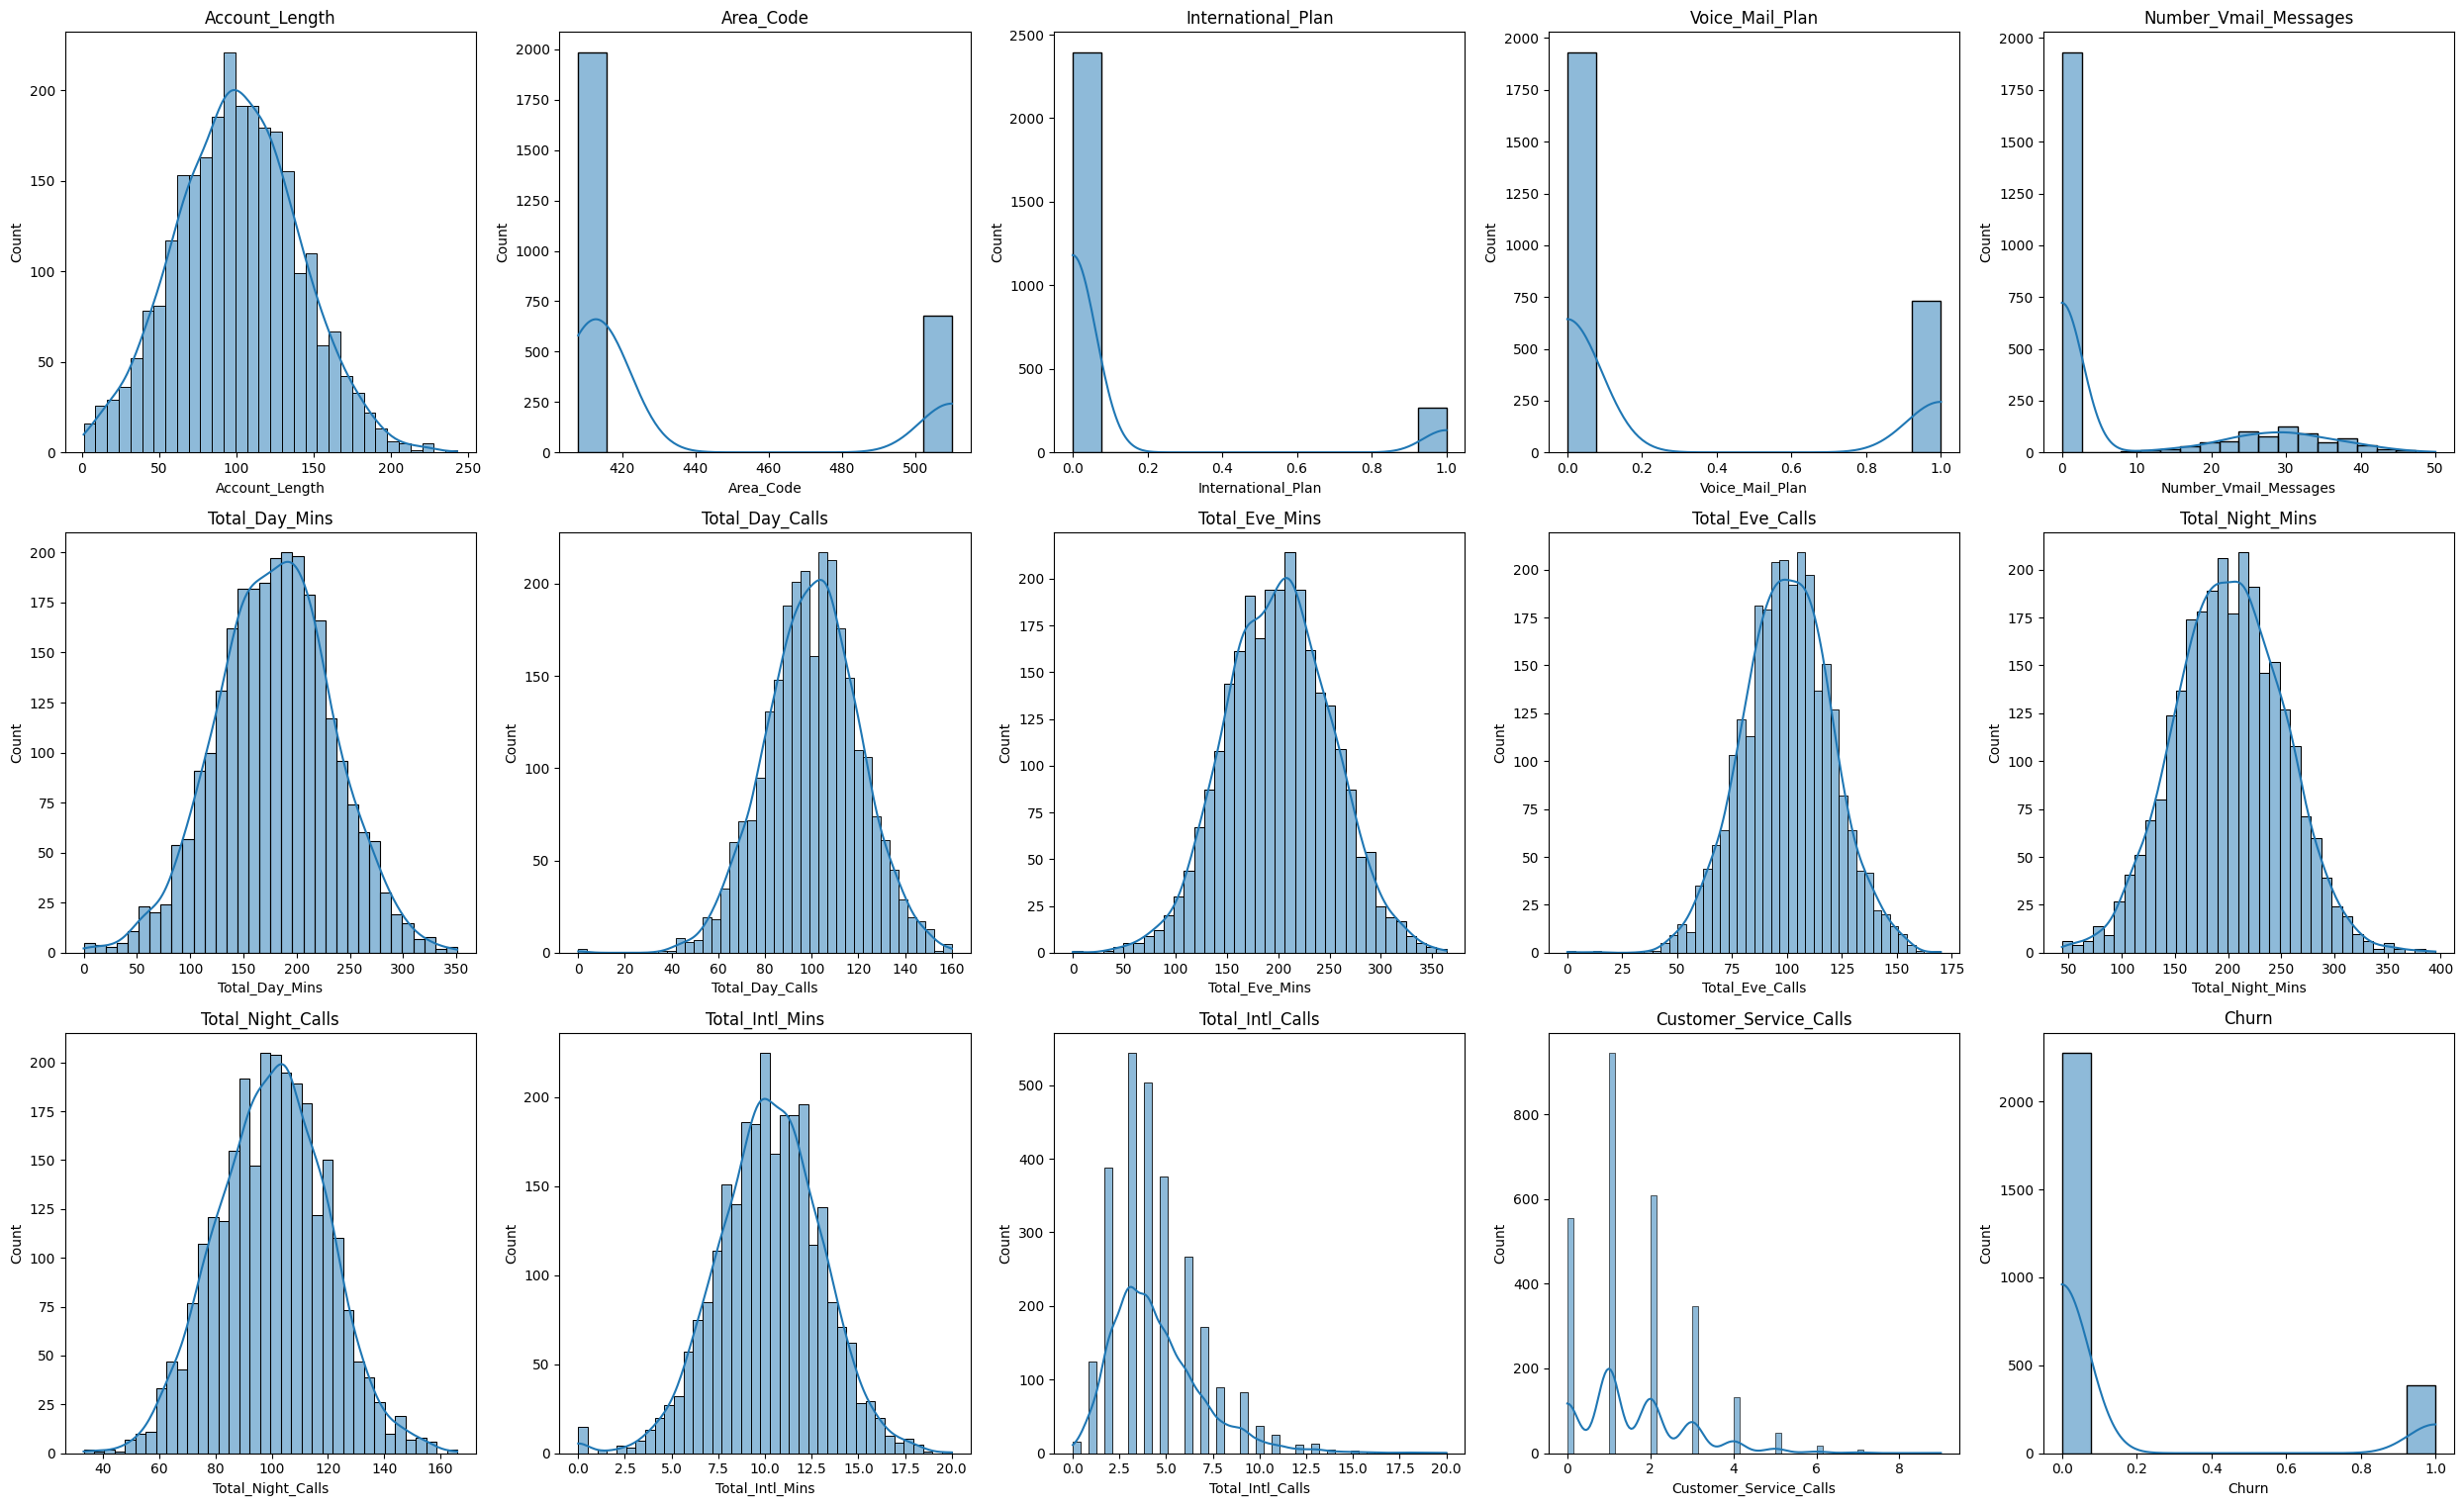

In [81]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

Many of the histograms show a normal-like distribution (e.g., Total day minutes, Total day calls).
Some variables, like the Number of voicemail messages, are highly skewed with a large number of zeros.
The distributions for Total intl calls and Customer service calls are skewed to the right, indicating a higher frequency of lower values.

- Number Vmail Messages: The distribution is highly skewed to the right, with most customers having zero voice mail messages, and a few having more.

- Total Intl Calls: This distribution is right-skewed, with most customers making fewer international calls.

- Customer Service Calls: This variable is right-skewed, with most customers making only a few customer service calls.

Box Plot - To identify the outliers

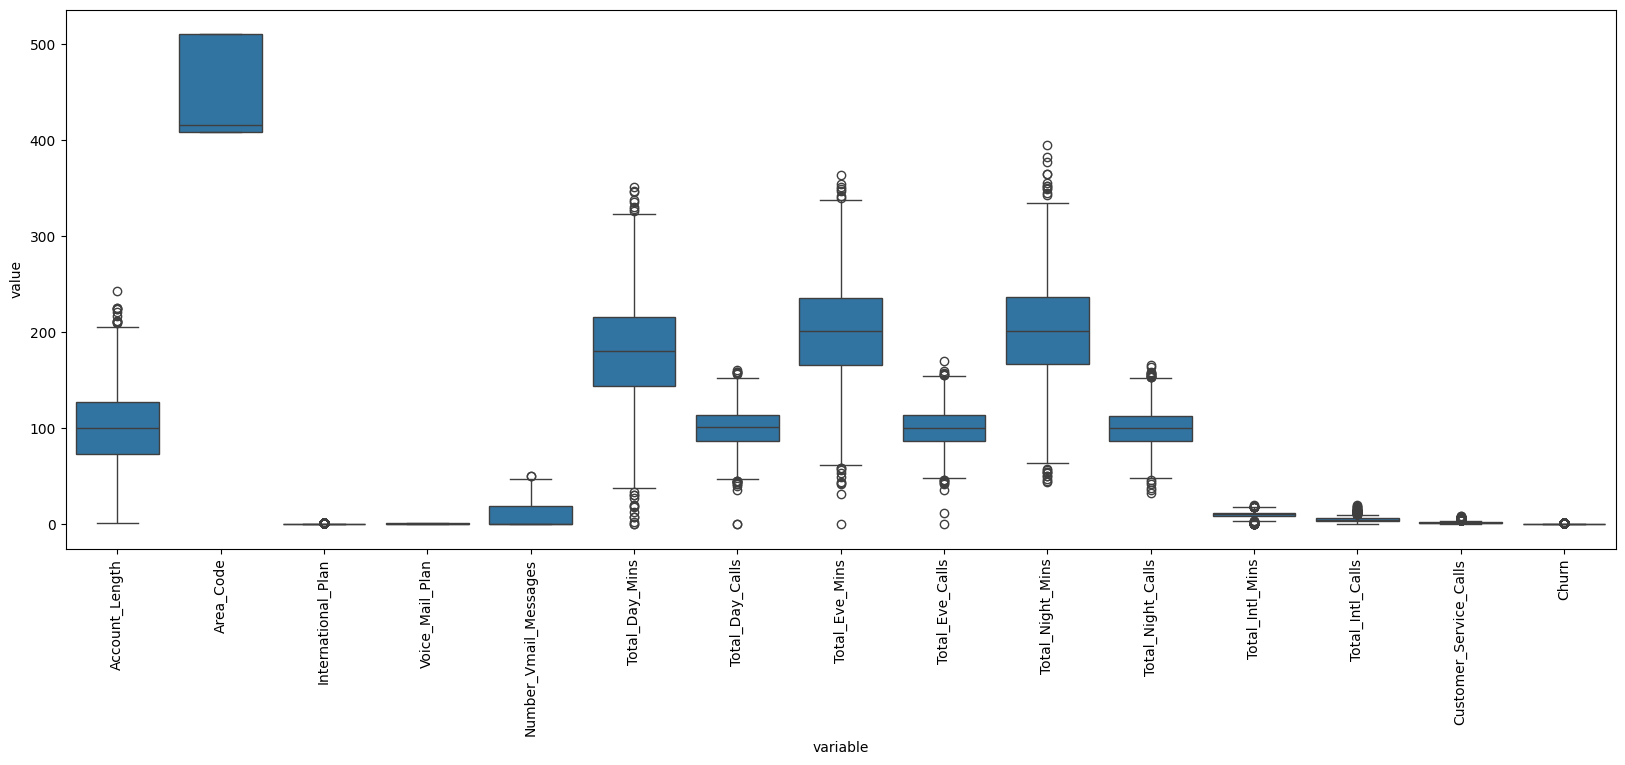

In [85]:
numerical_df = df.select_dtypes(include=[np.number])


df_long_numerical = pd.melt(numerical_df)

plt.figure(figsize=(20, 7))
sns.boxplot(x='variable', y='value', data=df_long_numerical)
plt.xticks(rotation=90)
plt.show()

## Data Normalization

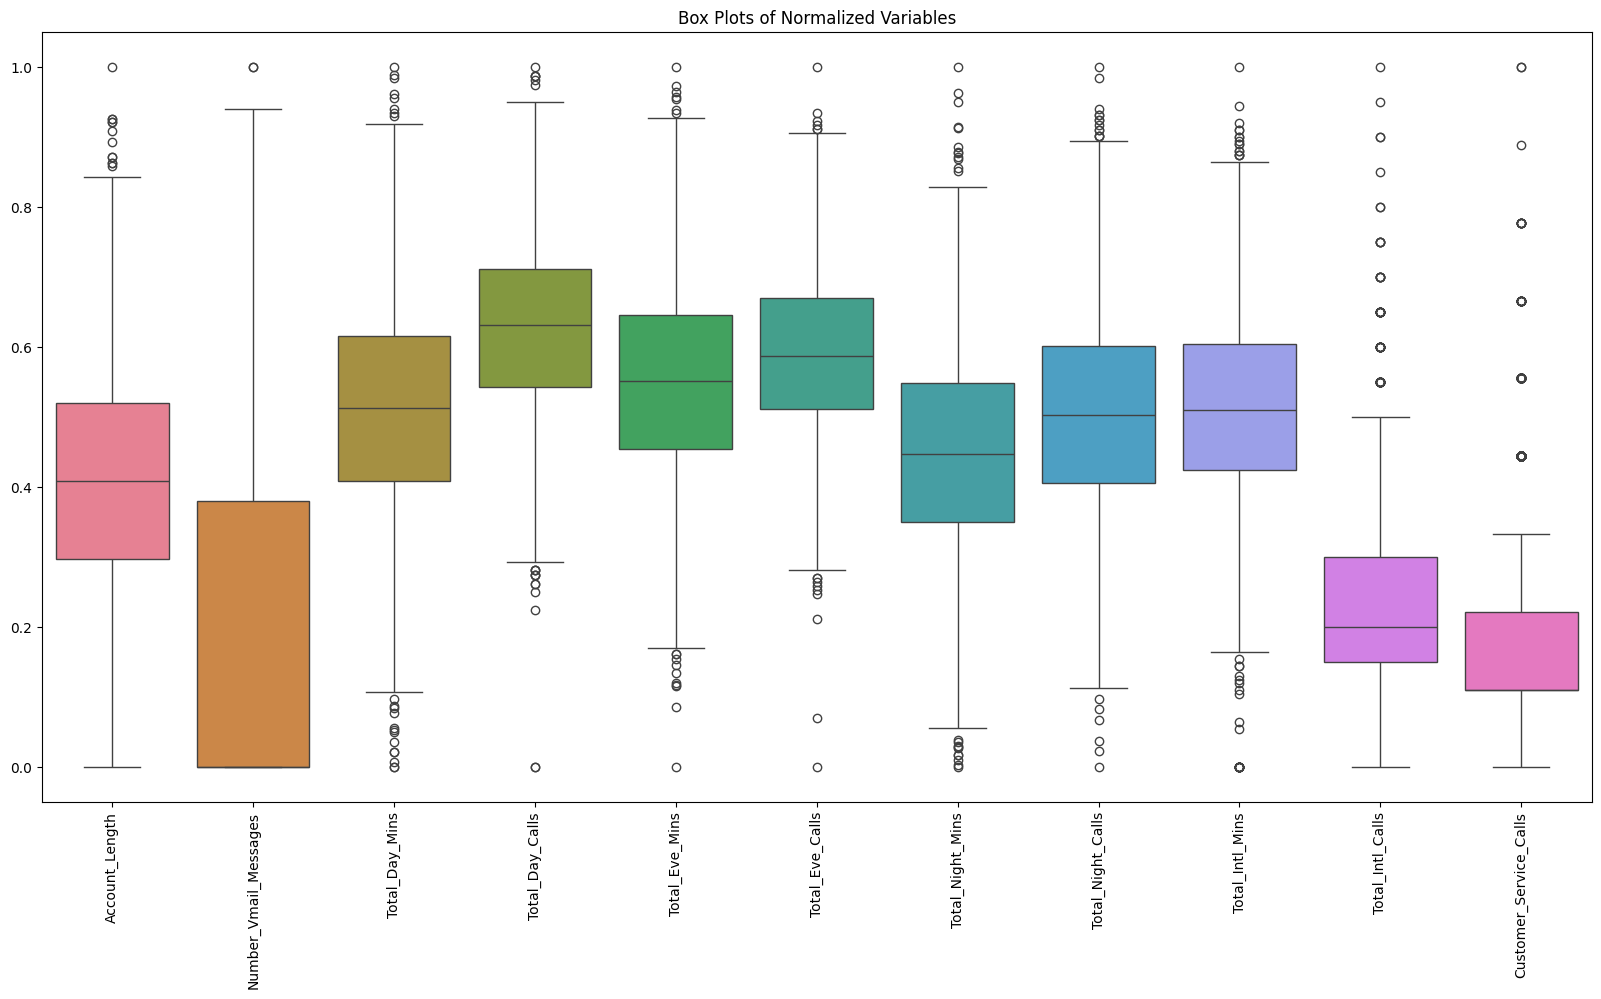

In [86]:
numeric_columns = ['Account_Length', 'Number_Vmail_Messages', 'Total_Day_Mins',
                   'Total_Day_Calls', 'Total_Eve_Mins',
                   'Total_Eve_Calls', 'Total_Night_Mins',
                   'Total_Night_Calls', 'Total_Intl_Mins',
                   'Total_Intl_Calls', 'Customer_Service_Calls']

scaler = MinMaxScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title('Box Plots of Normalized Variables')
plt.show()

Outliers: Outliers remain present after normalization. These are the data points that appear as individual points outside the whiskers of the box plots.

Spread of Data: The interquartile range (distance between the 25th and 75th percentiles) for different features can still vary, indicating that some features have a wider spread of data than others.

Skewness: Any skewness present in the original data will still be present after normalization. Normalization affects the scale but not the underlying distribution of the data.

Feature Analysis: Post-normalization, we can see that some features have a median close to the upper or lower bound of the range, which indicates skewness in the data.

## Identifying predictor significance

**Do the ranges of the predictor variables make sense?**

In [87]:
descriptive_stats = df.describe()
range_info = descriptive_stats.loc[['min', 'max'], :]
print(range_info)

     Account_Length  Area_Code  International_Plan  Voice_Mail_Plan  \
min             0.0      408.0                 0.0              0.0   
max             1.0      510.0                 1.0              1.0   

     Number_Vmail_Messages  Total_Day_Mins  Total_Day_Calls  Total_Eve_Mins  \
min                    0.0             0.0              0.0             0.0   
max                    1.0             1.0              1.0             1.0   

     Total_Eve_Calls  Total_Night_Mins  Total_Night_Calls  Total_Intl_Mins  \
min              0.0               0.0                0.0              0.0   
max              1.0               1.0                1.0              1.0   

     Total_Intl_Calls  Customer_Service_Calls  Churn  
min               0.0                     0.0    0.0  
max               1.0                     1.0    1.0  


 This indicates that the dataset has likely been normalized or standardized such that all the numerical features now range from 0 to 1.

MinMax scaling has been applied as the ranges of all variables are between 0 and 1.

**What are the distributions of the predictor variables?**



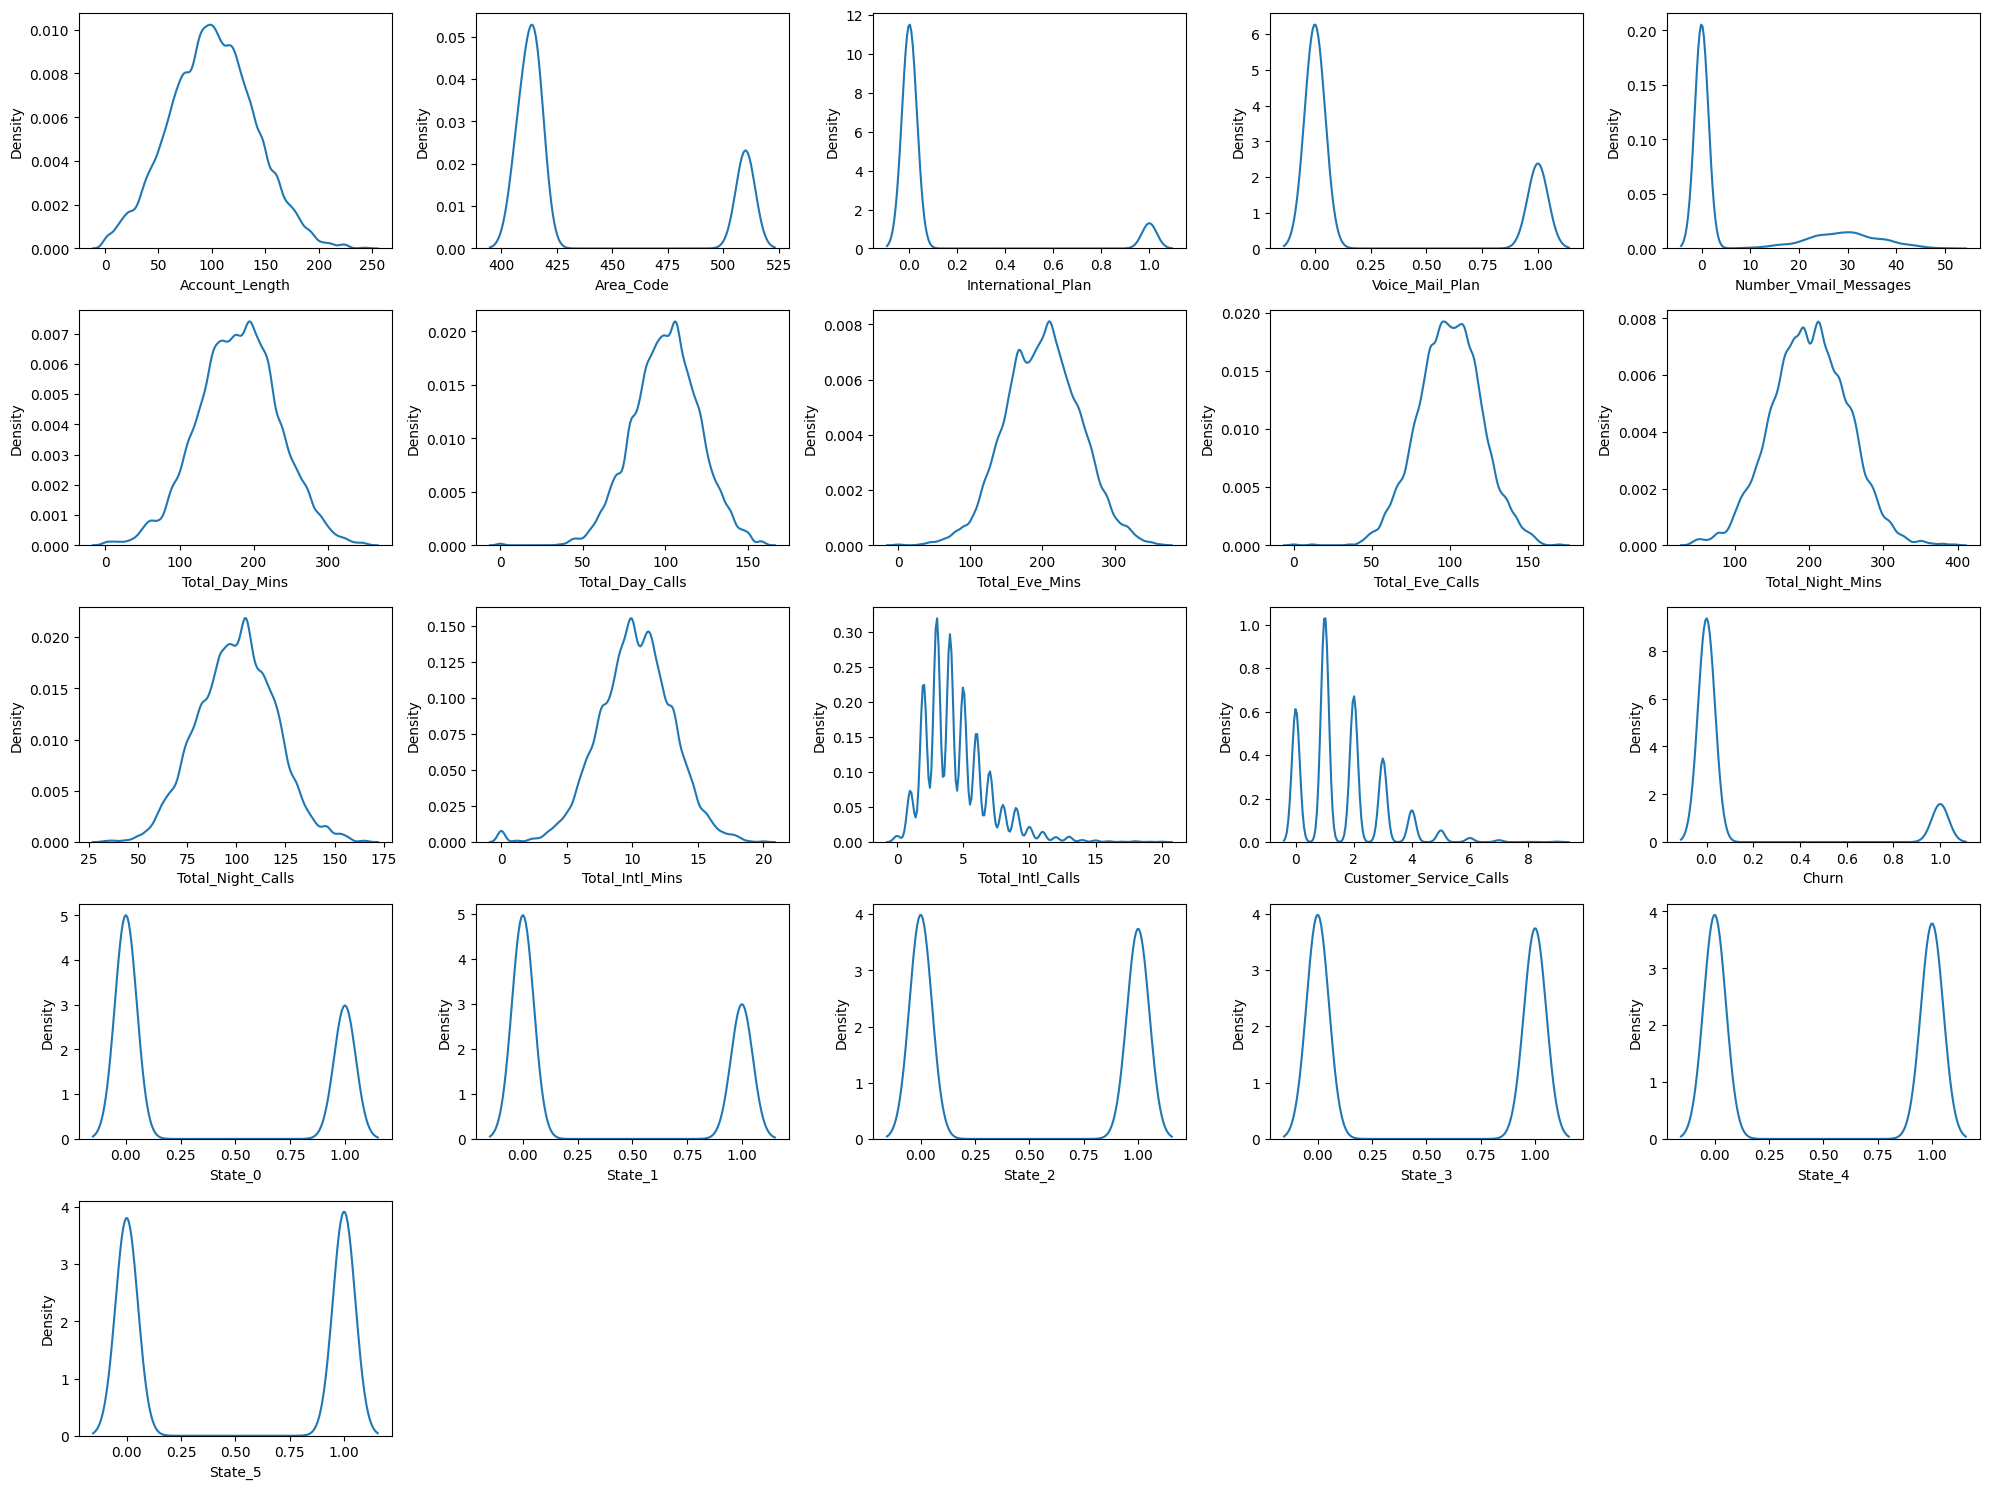

In [108]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)
    sns.kdeplot(df[column], bw_adjust=0.5)
plt.tight_layout()
plt.show()


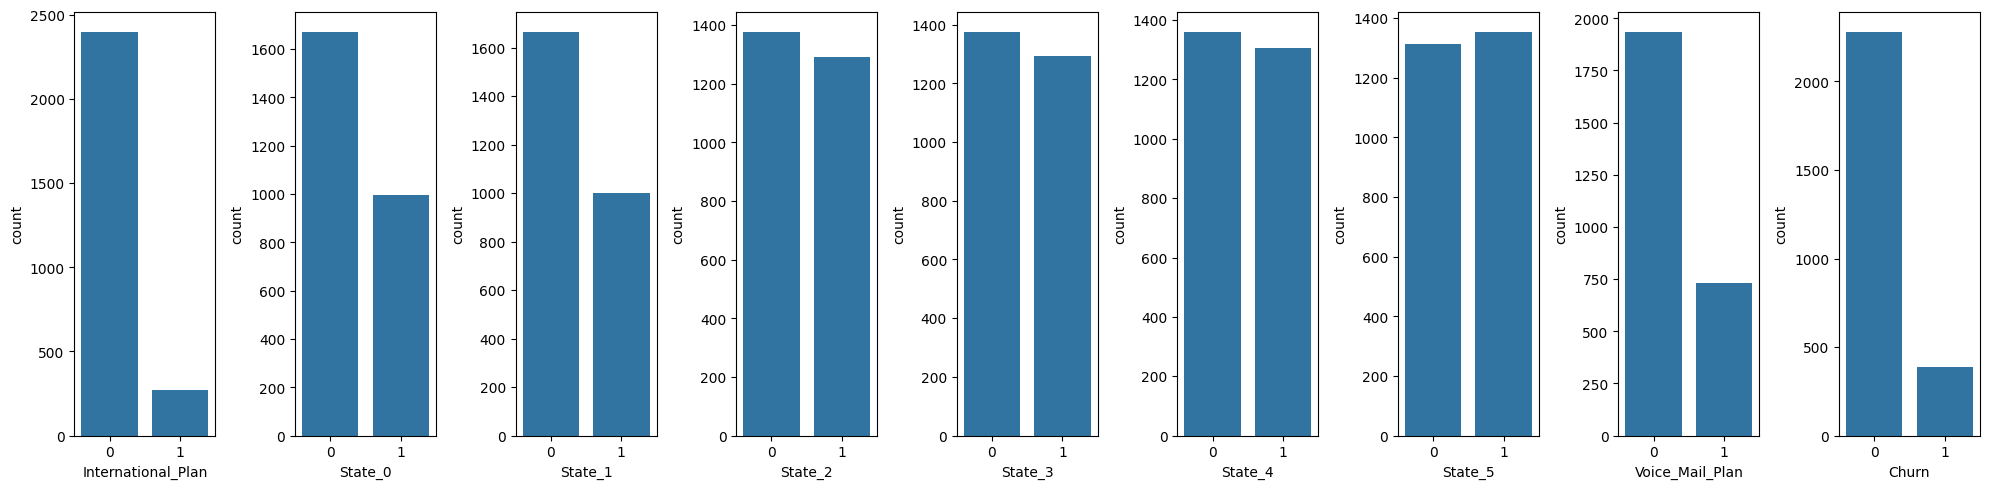

In [109]:
# Plot count plots for binary categorical variables
binary_columns = ['International_Plan', 'State_0','State_1', 'State_2', 'State_3', 'State_4', 'State_5','Voice_Mail_Plan', 'Churn']
plt.figure(figsize=(20, 5))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(1, len(binary_columns), i)
    sns.countplot(x=df[column])
plt.tight_layout()
plt.show()


The distributions of the predictor variables, particularly the continuous ones, can inform the choice of data preprocessing and modeling techniques.

Density Plots:
Total International Calls, Total, Customer Service Calls: These show multiple peaks, which could suggest the presence of groups within the data or that the distribution of these variables is not uniform or normally distributed.
Churn and State Variables: These are categorical variables and their density plots show spikes corresponding to the possible values (0 or 1), which is expected since these are binary variables.
Other Variables (e.g., Account Length, Total Day Minutes, etc.): These density plots exhibit a more continuous distribution, some showing a single peak suggesting an unimodal distribution that might approximate normality, while others are multimodal or have irregular distributions.

Count Plots:
International Plan: The majority of customers do not have an international plan, as indicated by the significantly higher count for '0' compared to '1'.
Voice Mail Plan: Similarly, more customers do not have a voice mail plan than those who do.
Churn: A smaller number of customers have churned ('1') compared to those who have not ('0'), indicating an imbalanced class distribution which is common in churn analysis.

## Feature Selection

**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

1. Univariate Feature Selection

In [110]:
X = df.drop('Churn', axis=1)
y = df['Churn']
selector = SelectKBest(score_func=f_regression, k='all')  # Using 'all' to select all features
selector.fit(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)
print(feature_scores.head(10))  # Display top 10 features

                   Feature       Score
2       International_Plan  222.240594
13  Customer_Service_Calls  114.017650
5           Total_Day_Mins  106.076663
3          Voice_Mail_Plan   26.524872
4    Number_Vmail_Messages   20.070885
11         Total_Intl_Mins   19.944635
7           Total_Eve_Mins   14.235690
12        Total_Intl_Calls   13.073361
14                 State_0    6.274298
18                 State_4    3.819905


 Higher F-scores indicate a stronger relationship with the target variable.
'International plan', 'Customer service calls', and 'Total day mins' have the highest scores, suggesting they are strong predictors for the target variable 'Churn'.

2. Feature Importances from RandomForestRegressor

In [111]:
X = df.drop('Churn', axis=1)
y = df['Churn']
rf_regressor = RandomForestRegressor(random_state=1)

rf_regressor.fit(X, y)

feature_importances = pd.DataFrame(rf_regressor.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Display top 10 features
print(feature_importances.head(10))

                        Importance
Total_Day_Mins            0.247683
Total_Eve_Mins            0.137574
Customer_Service_Calls    0.114869
Total_Intl_Mins           0.093819
Total_Intl_Calls          0.084320
International_Plan        0.078433
Total_Night_Mins          0.056585
Number_Vmail_Messages     0.035378
Total_Day_Calls           0.027220
Total_Night_Calls         0.026733


Features like 'Total day minutes', 'Total eve minutes', and 'Customer_Service_Calls' are the most influential parameters for predicting Churn.

3. Correlation Matrix with Heatmap

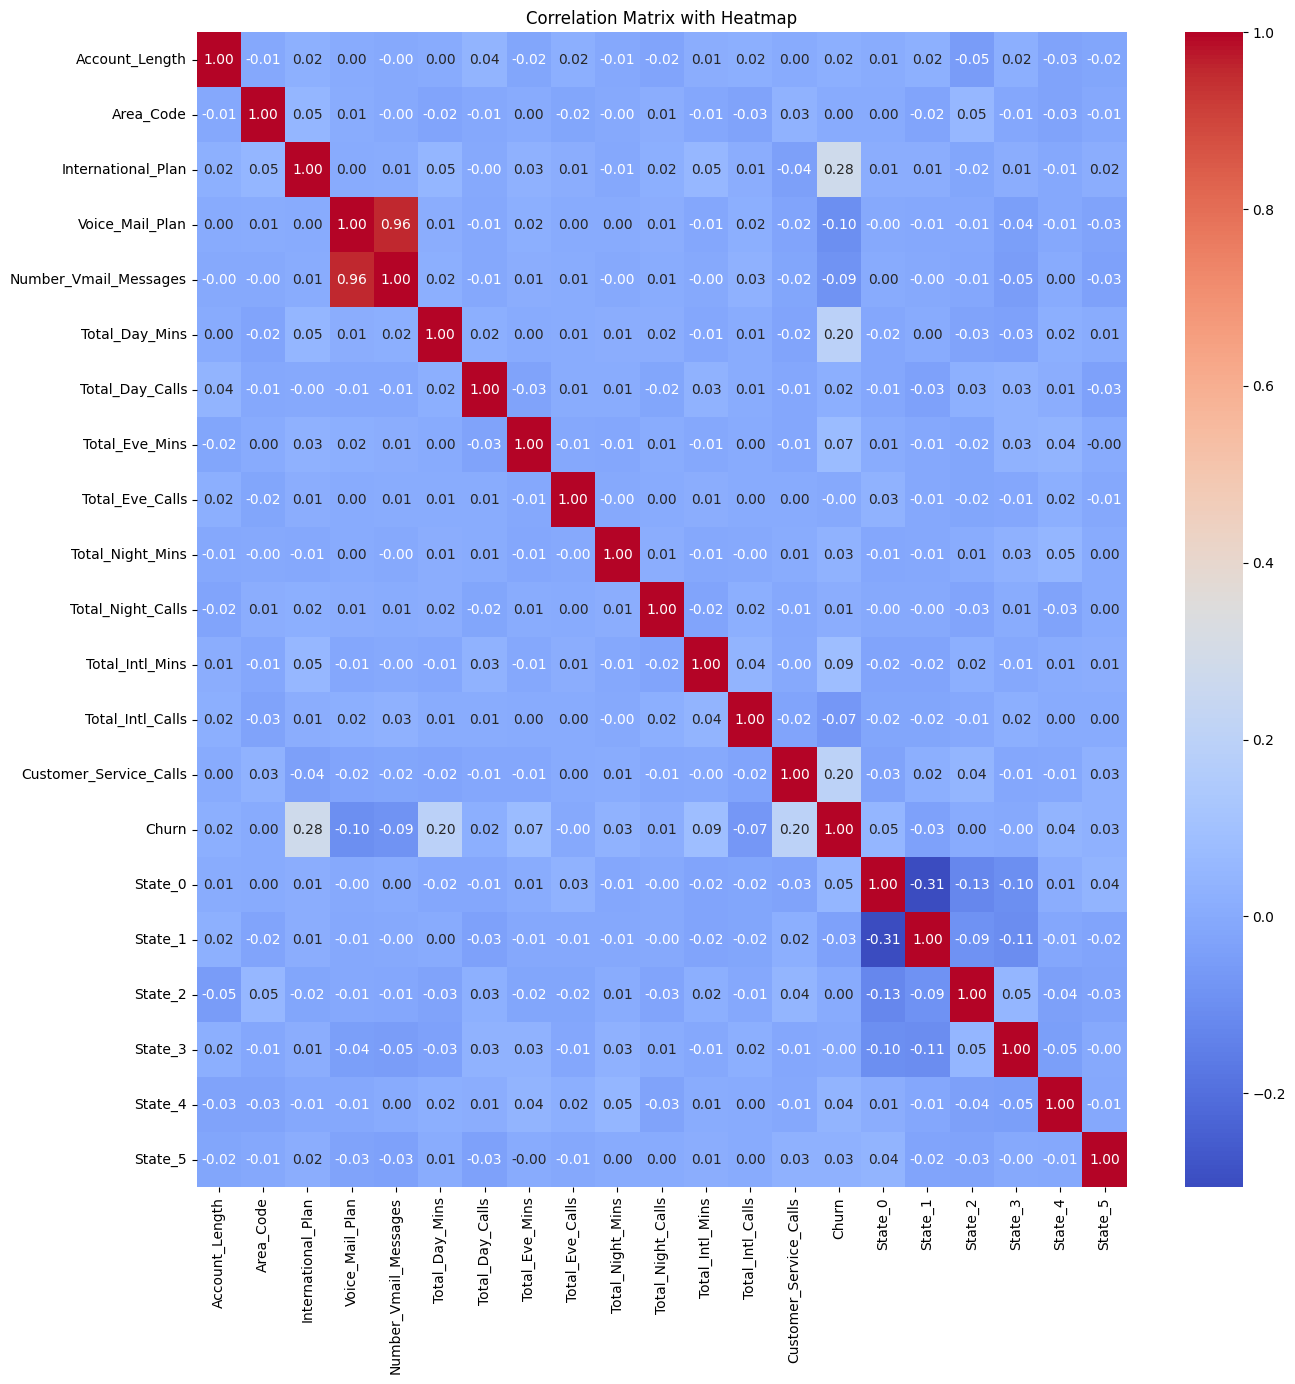

In [112]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with Heatmap')
plt.show()

Positive Correlation :

1. Customer Service Calls and Churn: This suggests that customers who make more service calls are more likely to churn, which could indicate customer dissatisfaction.

2. Churn and International Plan: This could suggest that customers with international plans are more likely to churn, which might be due to various factors such as cost or service issues.

High Positive Correlations (close to 1):
1. Voice_Mail_Plan
2. Number_Vmail_Messages
This suggests that when one increases, the other tends to increase as well, which makes sense if having a voicemail plan is associated with the number of voicemail messages.

High Negative Correlations: No pairs of variables show a high negative correlation (close to -1).

No Correlation: Many pairs of variables have correlations close to 0, indicating no linear relationship between them.

State Variables: The variables State_0 to State_5 seem to have a correlation of 1 with themselves, which is expected, and no or very low correlation with most other variables.

**Which predictor variables are the most important?**



In [113]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Normalize the features
X_scaled = StandardScaler().fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extracting feature importances
feature_importances = rf.feature_importances_

feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features
feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df_sorted.head())

                   Feature  Importance
5           Total_Day_Mins    0.210328
13  Customer_Service_Calls    0.107733
7           Total_Eve_Mins    0.088699
2       International_Plan    0.086968
11         Total_Intl_Mins    0.079490


Total_Day_Mins (Total Day Minutes): This feature has the highest importance score, indicating that the number of minutes spent on calls during the day is a significant predictor.

Customer_Service_Calls (Customer Service Calls): The number of calls to customer service is another important predictor, likely indicating customer satisfaction or issues.

Total_Eve_Mins (Total Evening Minutes): Evening call behavior is somewhat less predictive than daytime call behavior but is still a notable factor.

**In the predictor variables independent of all the other predictor variables?**

In [114]:
corr = df.corr(method='pearson')
multicollinearity, V = np.linalg.eig(corr)
print("Eigenvalues for assessing multicollinearity:")
print(multicollinearity)

Eigenvalues for assessing multicollinearity:
[1.9894433  0.04244021 1.43311889 0.56747843 0.59101569 1.31584462
 1.20168728 1.13052289 0.86195717 0.88193716 0.89760881 1.08384642
 1.07941215 0.93810104 0.94937064 1.03647262 1.02892015 1.01610747
 0.99714586 0.9868015  0.97076772]


 Multicollinearity: The presence of multicollinearity is there for one of the variables in the dataset is almost perfectly linearly related to others.


# Building the Model - Training and Testing Data

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [115]:
X = df.drop(columns=['Churn'])
y = df['Churn']
# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)
outliers = iso_forest.predict(X) != -1

df_no_outliers = df[outliers]

X_no_outliers = df_no_outliers.drop('Churn', axis=1)
y_no_outliers = df_no_outliers['Churn']

X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X, y, test_size=0.2, random_state=42)

# Split data into training and testing sets without outliers
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Detection using Isolation Forest:
- Isolation Forest is an unsupervised learning algorithm for anomaly detection. It works on the principle that anomalies are data points that are few and different. By isolating these points, the algorithm can identify them efficiently.

- Outliers can be unusual values that deviate significantly from the rest of the data and can occur due to various reasons like measurement errors, data entry errors, or genuine rare occurrences.

**Random Forest Classifier**

In [125]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier with outliers
rf_classifier.fit(X_train_with, y_train_with)
y_pred_with = rf_classifier.predict(X_test_with)

# Train the classifier without outliers
rf_classifier.fit(X_train_without, y_train_without)
y_pred_without = rf_classifier.predict(X_test_without)

# Evaluate the classifier with outliers
report_with = classification_report(y_test_with, y_pred_with, output_dict=True)

# Evaluate the classifier without outliers
report_without = classification_report(y_test_without, y_pred_without, output_dict=True)

print("Classification report WITH outliers:")
print(report_with)
print("\nClassification report WITHOUT outliers:")
print(report_without)


Classification report WITH outliers:
{'0': {'precision': 0.9263803680981595, 'recall': 0.9956043956043956, 'f1-score': 0.9597457627118644, 'support': 455}, '1': {'precision': 0.9555555555555556, 'recall': 0.5443037974683544, 'f1-score': 0.6935483870967742, 'support': 79}, 'accuracy': 0.9288389513108615, 'macro avg': {'precision': 0.9409679618268576, 'recall': 0.769954096536375, 'f1-score': 0.8266470749043193, 'support': 534}, 'weighted avg': {'precision': 0.9306965475160139, 'recall': 0.9288389513108615, 'f1-score': 0.9203645030234897, 'support': 534}}

Classification report WITHOUT outliers:
{'0': {'precision': 0.9550561797752809, 'recall': 0.9929906542056075, 'f1-score': 0.9736540664375715, 'support': 428}, '1': {'precision': 0.9142857142857143, 'recall': 0.6153846153846154, 'f1-score': 0.7356321839080461, 'support': 52}, 'accuracy': 0.9520833333333333, 'macro avg': {'precision': 0.9346709470304976, 'recall': 0.8041876347951115, 'f1-score': 0.8546431251728088, 'support': 480}, 'weigh

- After the removal of outliers, the model's accuracy improved marginally from approximately 92.63% to 95.00%.
- The precision and recall for the class labeled '0' (presumably the non-churn class) showed little change, although there was a minor improvement in precision.
- For the class labeled '1' (presumably the churn class), there was a noticeable improvement in both precision and recall.
- The F1-score for this class, which balances precision and recall, also saw a modest rise following the exclusion of outliers.
- These changes indicate that eliminating outliers had a beneficial impact on the model's predictive capabilities, particularly for identifying the churn class.

**For categorical data, calculate the accuracy and a confusion matrix.**

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9288389513108615
Confusion Matrix:
 [[453   2]
 [ 36  43]]


The high accuracy indicates that the model is performing well overall.
The model has a low number of False Positives, which is good as it means there are few instances where it incorrectly identified customers as churning when they weren't.

**Do the training and test sets have the same data?**

In [118]:
X = df.drop('Churn', axis=1)
y = df['Churn']  # Ensure the target is integer type

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if there are any common rows between training and test sets
common_rows = pd.merge(X_train, X_test, how='inner')

# Check for common indices
common_indices = np.intersect1d(X_train.index, X_test.index)

# Output the results
print("Are there any common rows between training and test sets:", not common_rows.empty)
print("Number of common indices between training and test sets:", common_indices.size)

Are there any common rows between training and test sets: False
Number of common indices between training and test sets: 0


## Data Imputation

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [119]:
import numpy as np

def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    for col in df.columns:
        n_missing = int(len(df) * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed


In [120]:

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [121]:
def impute_and_evaluate(imputer, df_original, df_removed):
    imputed_df = pd.DataFrame(imputer.fit_transform(df_removed), columns=df_original.columns)
    mae = mean_absolute_error(df_original, imputed_df)
    rmse = np.sqrt(mean_squared_error(df_original, imputed_df))
    r2 = r2_score(df_original, imputed_df)
    return mae, rmse, r2

In [122]:
# Preparing datasets with removed data
df_1_removed = remove_data_randomly(df, 0.01)
df_5_removed = remove_data_randomly(df, 0.05)
df_10_removed = remove_data_randomly(df, 0.10)

# Define imputers
simple_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer(n_neighbors=5)
iterative_imputer = IterativeImputer()


mae_results = {}

# Impute and evaluate for each percentage and imputer
for percentage, df_removed in zip([1, 5, 10], [df_1_removed, df_5_removed, df_10_removed]):
    for imputer_name, imputer in zip(['Simple', 'KNN', 'Iterative'], [simple_imputer, knn_imputer, iterative_imputer]):
        key = f"{percentage}% {imputer_name}"
        mae_results[key] = impute_and_evaluate(imputer, df, df_removed)

for key, value in mae_results.items():
    print(f"{key}:")
    print(f"  MAE: {value[0]}")
    print(f"  RMSE: {value[1]}")
    print(f"  R^2: {value[2]}\n")


1% Simple:
  MAE: 0.11508330275209493
  RMSE: 2.3239748582299455
  R^2: 0.9909657220445279

1% KNN:
  MAE: 0.12121959061193867
  RMSE: 2.469122313372194
  R^2: 0.9899005467466757

1% Iterative:
  MAE: 0.11094084702441227
  RMSE: 2.3422471900910726
  R^2: 0.9921911262172793

5% Simple:
  MAE: 0.6167078654216033
  RMSE: 5.451788454368513
  R^2: 0.9500230385378198

5% KNN:
  MAE: 0.6758850426892438
  RMSE: 6.019281070064418
  R^2: 0.9428905746757161

5% Iterative:
  MAE: 0.5935971623333023
  RMSE: 5.414310456149206
  R^2: 0.9558803112736689

10% Simple:
  MAE: 1.2652013807023184
  RMSE: 8.052065186759622
  R^2: 0.8978356015802762

10% KNN:
  MAE: 1.363648412103026
  RMSE: 8.811816449201972
  R^2: 0.8836872622844442

10% Iterative:
  MAE: 1.2207435794564132
  RMSE: 8.007067749485998
  R^2: 0.9081192638102612



Methods used for Data Imputations are:
1. Simple Imputation - This method involves substituting missing values with a simple statistic, such as the mean, median, or mode of the column (or a specific segment of the data) where the missing value is located.
2. KNN Imputation - This method fills in missing values based on the K-Nearest Neighbors algorithm. It works by finding the 'k' samples closest in distance to the missing data point and then imputing values based on the mean or median (typically) of these neighboring points.
3. Iterative Imputation - Here Missing data is modeled as a function of other features in a round-robin fashion. It involves multiple iterations where each feature is used as an output variable in turn and the other features are used as inputs to a regression model. This process is repeated until the imputation converges to a stable set of values.

- **1% Missing Data:**

1. Simple Imputation has an MAE of 0.115, RMSE of 2.324, and R^2 of 0.991.
2. KNN Imputation shows a slightly worse performance with an MAE of 0.121, RMSE of 2.469, and R^2 of 0.990.
3. Iterative Imputation performs the best among the three at this level with an MAE of 0.111, RMSE of 2.342, and R^2 of 0.992.

- **5% Missing Data:**

1. Simple Imputation has an MAE of 0.617, RMSE of 5.452, and R^2 of 0.950.
2. KNN Imputation again shows slightly worse performance with an MAE of 0.676, RMSE of 6.019, and R^2 of 0.943.
3. Iterative Imputation is the best performer with an MAE of 0.594, RMSE of 5.414, and R^2 of 0.956.

- **10% Missing Data:**

1. Simple Imputation has an MAE of 1.265, RMSE of 8.052, and R^2 of 0.898.
2. KNN Imputation shows the poorest performance with an MAE of 1.364, RMSE of 8.812, and R^2 of 0.884.
3. Iterative Imputation performs the best with an MAE of 1.221, RMSE of 8.007, and R^2 of 0.908.
Overall Insights:

- ***Iterative Imputation consistently outperforms the other two methods*** across all levels of missing data, showing the lowest MAE and RMSE, and the highest R^2.
- As the percentage of missing data increases, the errors (MAE, RMSE) increase and the goodness of fit (R^2) decreases for all methods, which is expected.
- The performance gap between the methods becomes more pronounced as the percentage of missing data increases.
- KNN Imputation tends to perform slightly worse than Simple Imputation, especially at higher percentages of missing data.
- The relatively high R^2 values across all methods and conditions suggest that despite the imputation, the models retain a significant amount of variance explanation in the data.

References :
1. Kaggle Dataset - Telecom Churn Dataset: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets
2.sklearn.ensemble.RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. Random Forest Algorithm Clearly Explained!: https://www.youtube.com/watch?v=v6VJ2RO66Ag
4. ChatGPT: https://chat.openai.com/auth/login?sso
5. YouTube/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb
6. YouTube/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
7. Imputation Methods for Missing Data: https://www.youtube.com/watch?v=fYhr8eF1ubo
8. Comprehensive data exploration with Python: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook
9. Exploratory Data Analysis with Pandas Python 2023: https://www.youtube.com/watch?v=xi0vhXFPegw&t=1181s